<a href="https://colab.research.google.com/github/sjunc/2025-1-myclass-BDA/blob/main/inclass/11W_B_Wed_0514_easy_ch09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09 데이터 분석 프로젝트

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [101]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
2.2.2
2.0.2
0.13.2
0.5.2


In [102]:
# 선명하게
%config InlineBackend.figure_format = 'retina'

In [103]:
# 코랩 matplotlib 한글화
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [104]:
path_to_sav = \
  "/data/Koweps_hpwc14_2019_beta2.sav"

In [105]:
# 그림 설정 크기, 화질
plt.rcParams.update({'figure.figsize': (7, 5), 'figure.dpi': '100'})
'''
로컬에서의 한글 설정

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

'''

"\n로컬에서의 한글 설정\n\nplt.rcParams['axes.unicode_minus'] = False\nplt.rc('font', family='Malgun Gothic')\n\nplt.rcParams['font.family'] = 'Malgun Gothic'\nplt.rcParams['axes.unicode_minus'] = False\n\n"

In [106]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [107]:
!pip install pyreadstat

In [108]:
raw_welfare = pd.read_spss('drive/MyDrive/data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [109]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [110]:
welfare = raw_welfare.copy()

In [111]:
welfare.shape

(14418, 830)

In [112]:
welfare = welfare.rename(columns= {'h14_g3':'sex',
                                   'h14_g4':'birth',
                                   'h14_g10':'marriage_type',
                                   'h14_g11':'religion',
                                   'p1402_8aq1':'income',
                                   'h14_eco9':'code_job',
                                   'h14_reg7':'code_region'})

In [113]:
welfare['sex']    # 1남자 2여자

,sex
0,2.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
14413,2.0
14414,2.0
14415,1.0
14416,2.0


In [114]:
welfare['sex'].dtypes

dtype('float64')

In [115]:
welfare.sex.value_counts()

,count
sex,
2.0,7913
1.0,6505


In [116]:
welfare.sex.isna().sum()    # 결측값 존재 X

np.int64(0)

In [117]:
welfare['sex'] = np.where(welfare['sex'] == 1.0, 'male', 'female')
welfare['sex'].value_counts()

,count
sex,
female,7913
male,6505


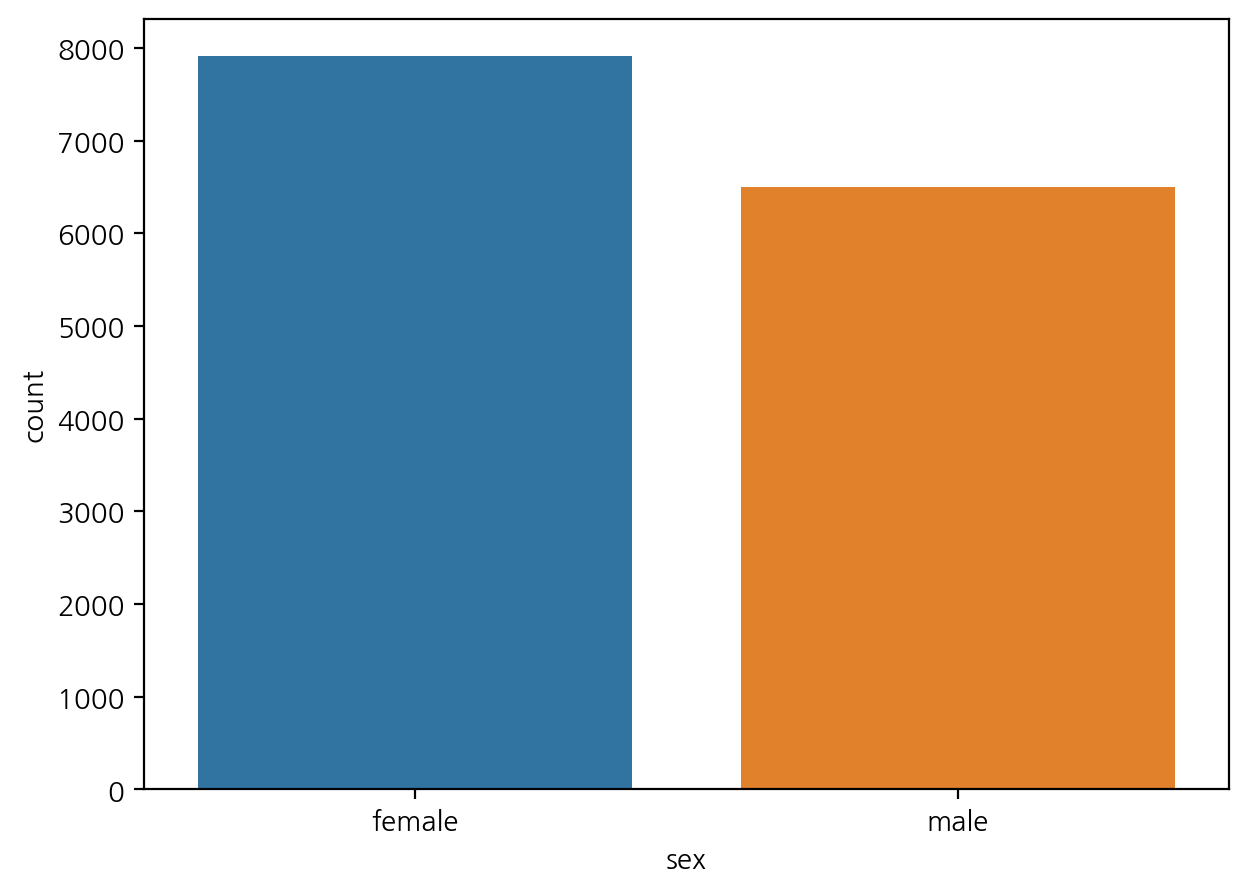

In [118]:
sns.countplot(welfare, x='sex', hue = 'sex');

# 11주차 수업

In [119]:
welfare['income'].dtypes

dtype('float64')

In [120]:
welfare['income'].describe()

,income
count,4534.00
mean,268.46
std,198.02
min,0.00
25%,150.00
50%,220.00
75%,345.75
max,1892.00


<Axes: xlabel='income', ylabel='Count'>

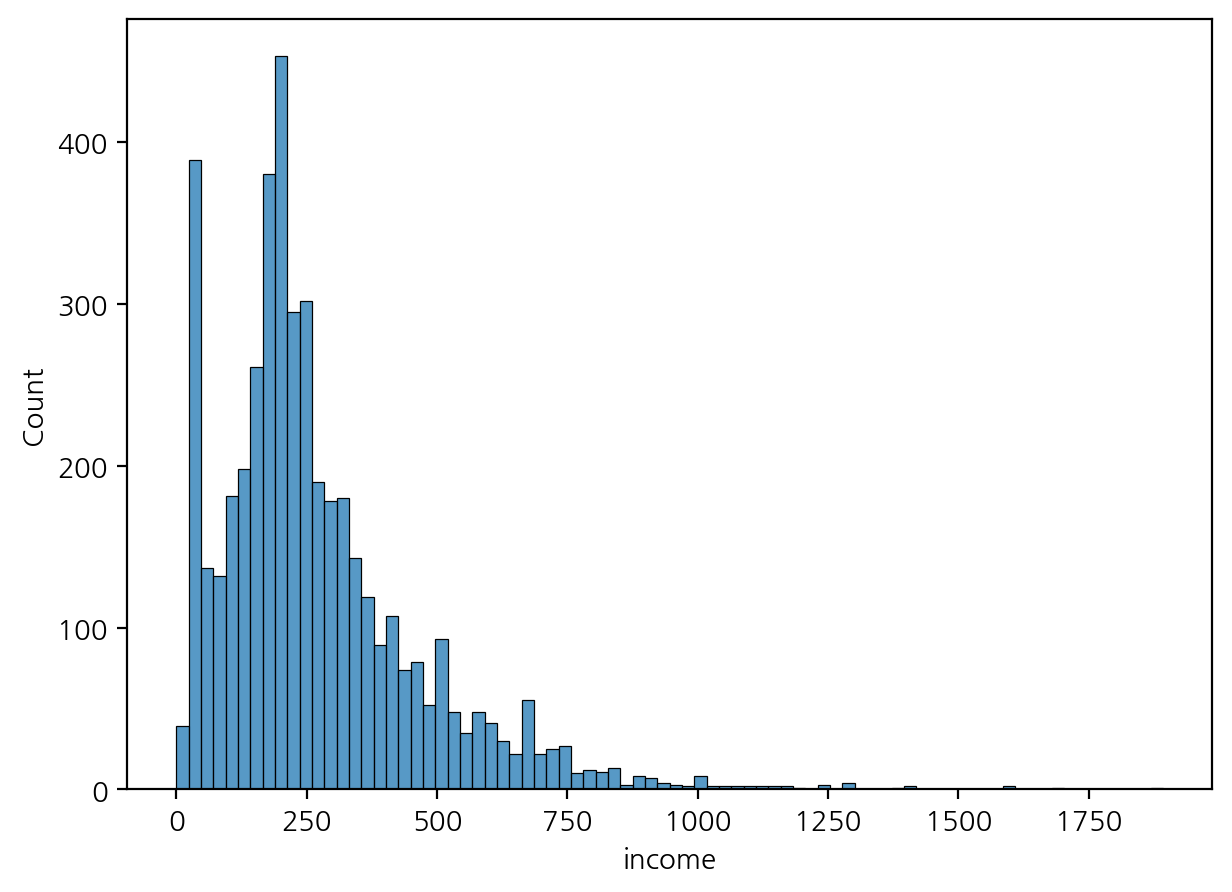

In [121]:
sns.histplot(welfare, x = 'income')

In [122]:
sex_income = welfare.dropna(subset=['income'])\
                    .groupby('sex', as_index = False)\
                    .agg(mean_income = ('income', 'mean'))

sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


In [123]:
sex_income = welfare.groupby('sex', as_index = False)\
                    .agg(mean_income = ('income', 'mean'))

sex_income              # null  값을 처리하지 않아도 알아서 빼고 처리함

,sex,mean_income
0,female,186.29
1,male,349.04


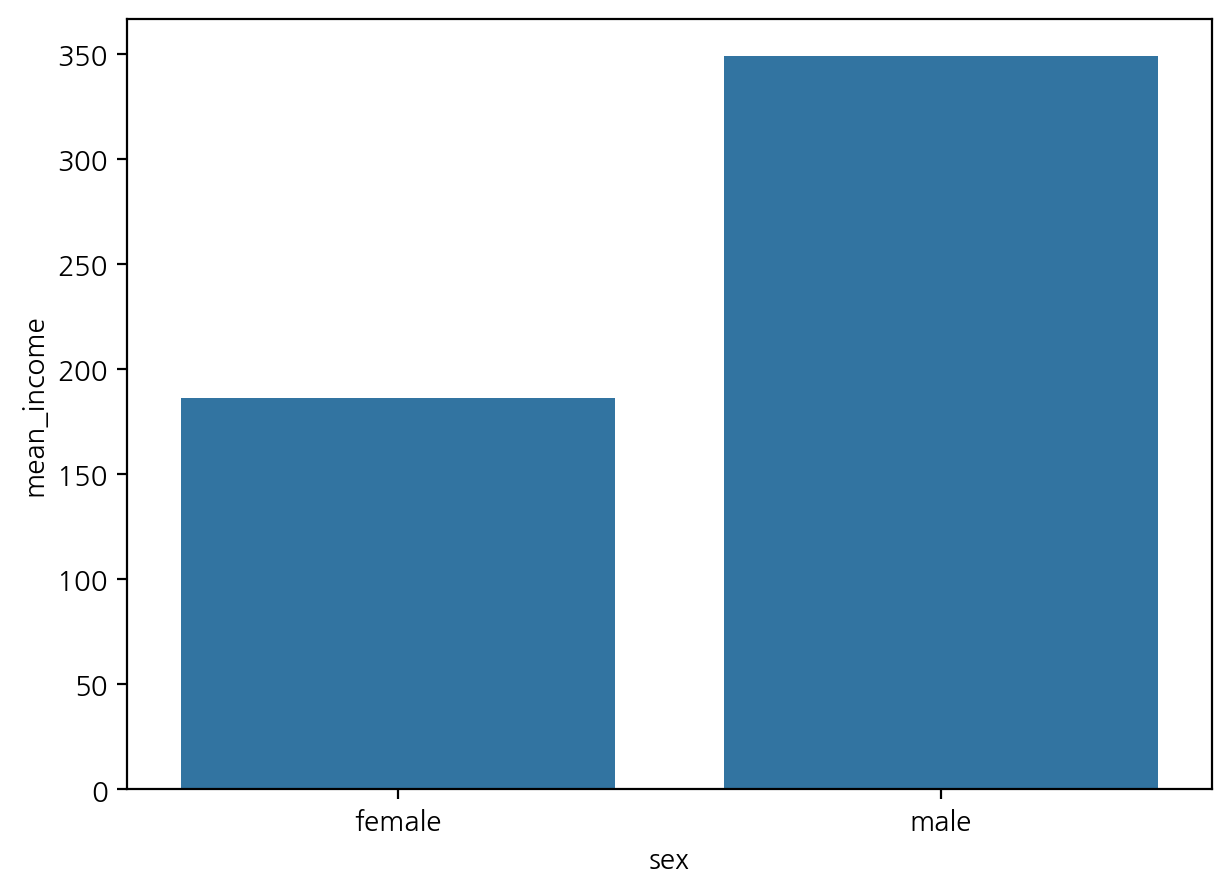

In [124]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income');

## 나이와 월급의 관계

In [125]:
welfare['birth'].dtypes

dtype('float64')

In [126]:
welfare['birth'].describe()

,birth
count,14418.00
mean,1969.28
std,24.40
min,1907.00
25%,1948.00
50%,1968.00
75%,1990.00
max,2018.00


<Axes: xlabel='birth', ylabel='Count'>

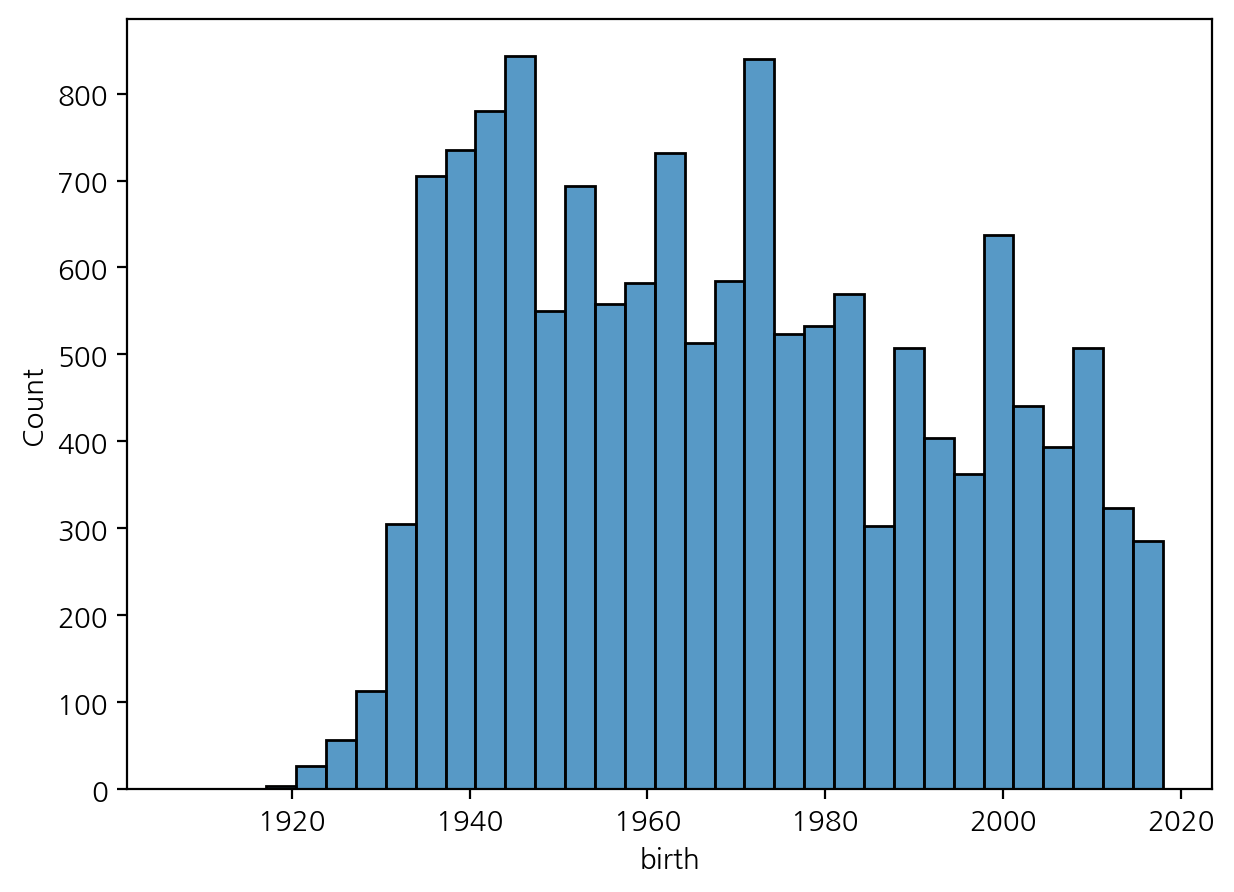

In [127]:
sns.histplot(welfare, x ='birth')

In [128]:
welfare['birth'].isna().sum()   # 결측값 없음

np.int64(0)

In [129]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 데이터 생성 년도
welfare['age'].describe()

,age
count,14418.00
mean,50.72
std,24.40
min,2.00
25%,30.00
50%,52.00
75%,72.00
max,113.00


<Axes: xlabel='age', ylabel='Count'>

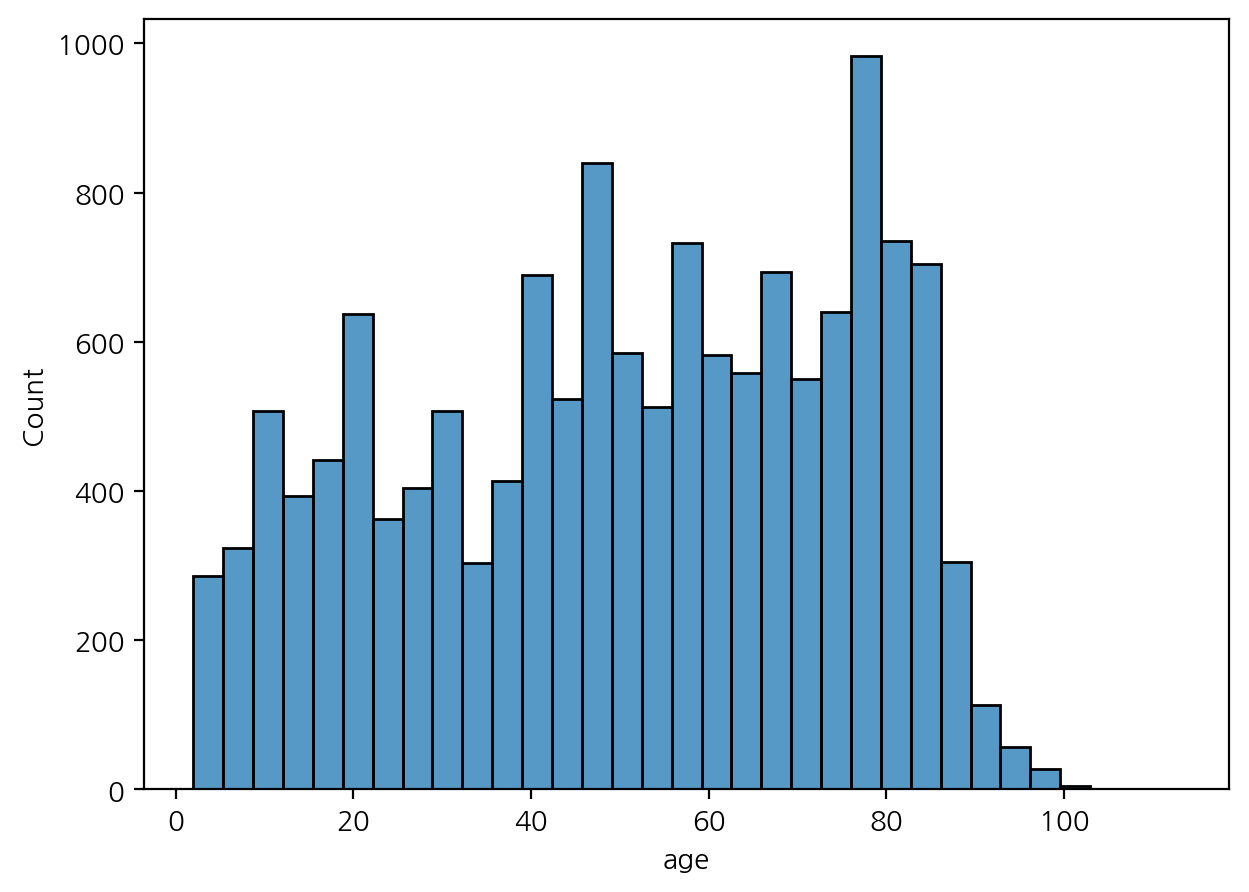

In [130]:
sns.histplot(welfare, x = 'age')

In [131]:
age_income = welfare.dropna(subset = ['income'])\
                    .groupby('age')\
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.00
20.0,121.33
21.0,136.40
22.0,123.67
23.0,179.68


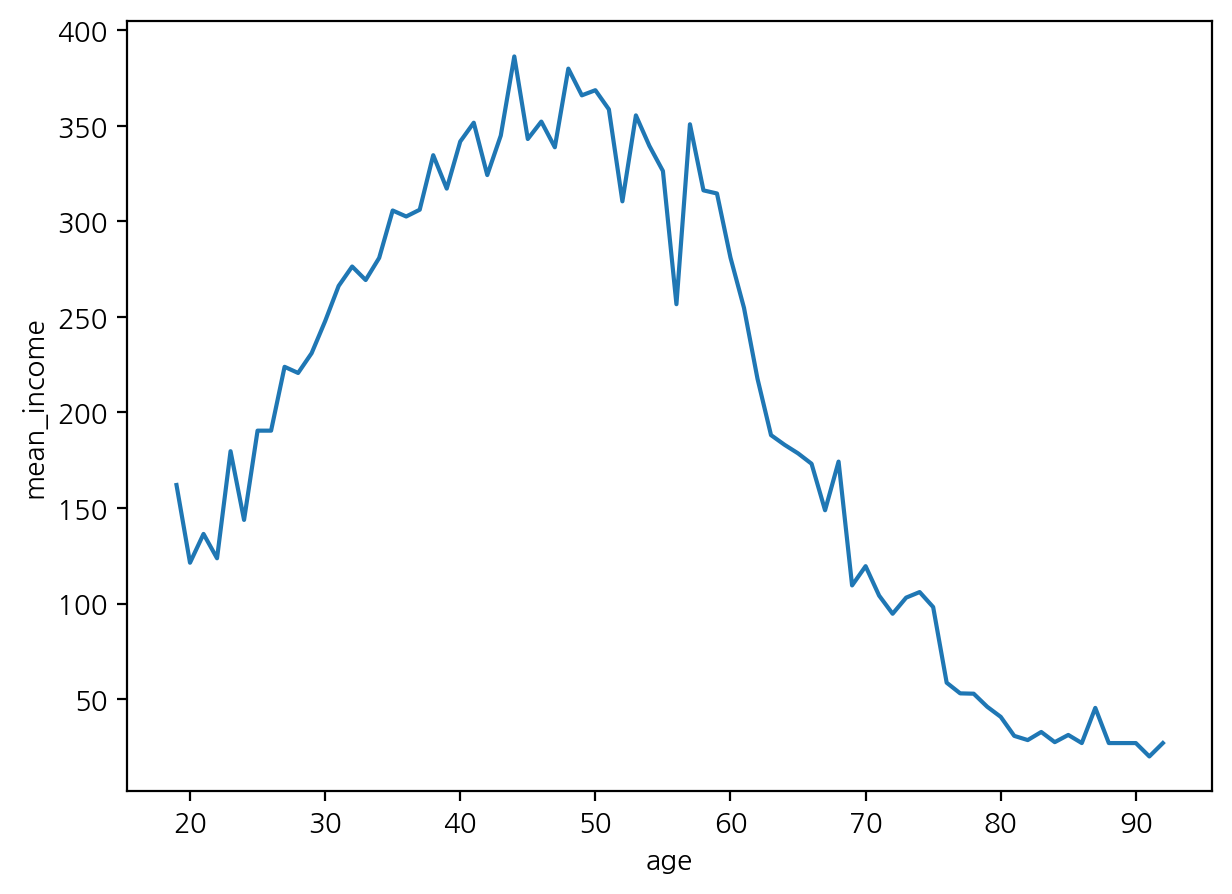

In [132]:
sns.lineplot(age_income, x ='age', y = 'mean_income');

In [133]:
welfare = welfare.assign(
    ageg = np.where(
        welfare['age'] < 30, 'young',
        np.where(welfare['age'] <= 59, 'middle', 'old')
    )
)

In [134]:
welfare['ageg'].value_counts()

,count
ageg,
old,5955
middle,4963
young,3500


<Axes: xlabel='ageg', ylabel='count'>

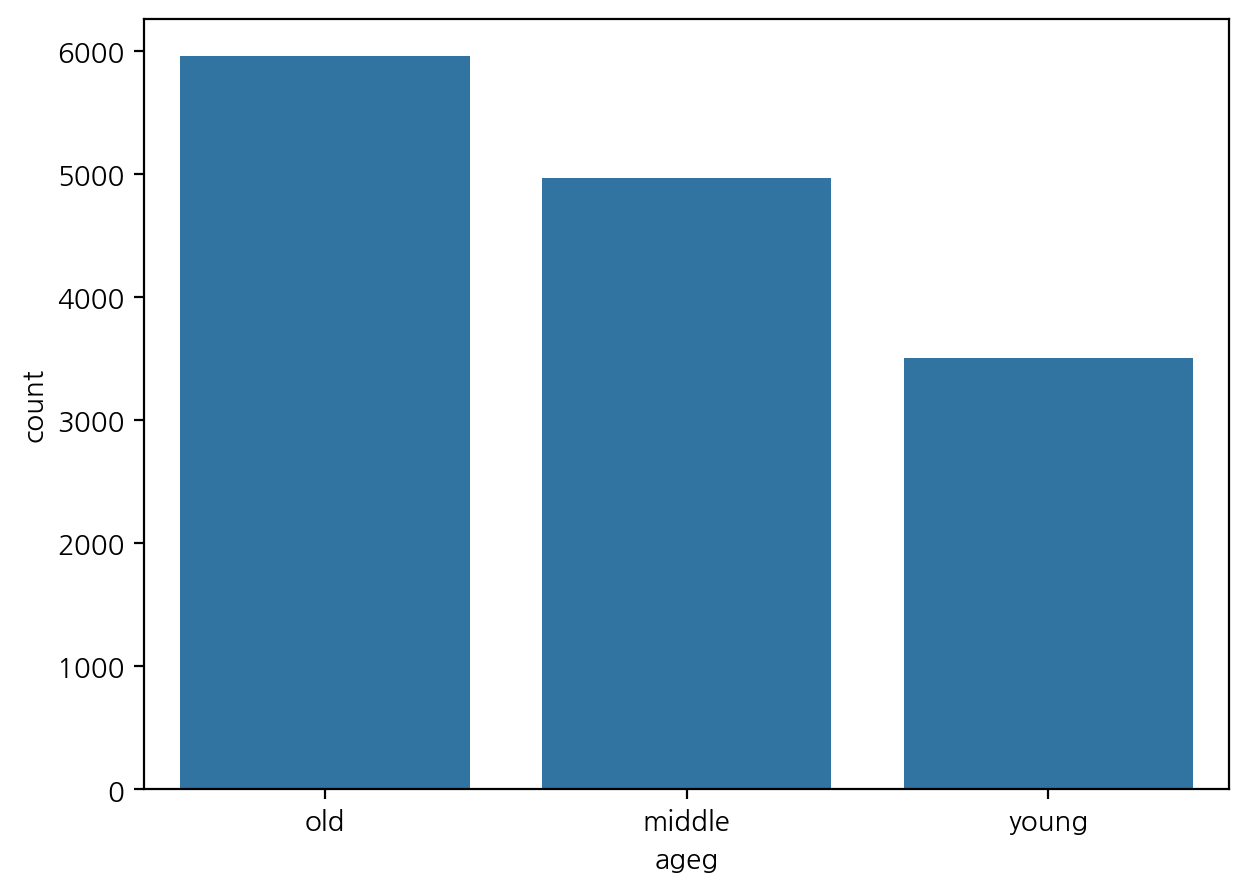

In [135]:
sns.countplot(welfare, x = 'ageg')

## 연령대에 따른 월급 차이 분석

In [136]:
## 연령대별 월급 평균표 만들기

# income 결측치 제거
# ageg별 분리
# income 평균 구하기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.16
1,old,140.13
2,young,195.66


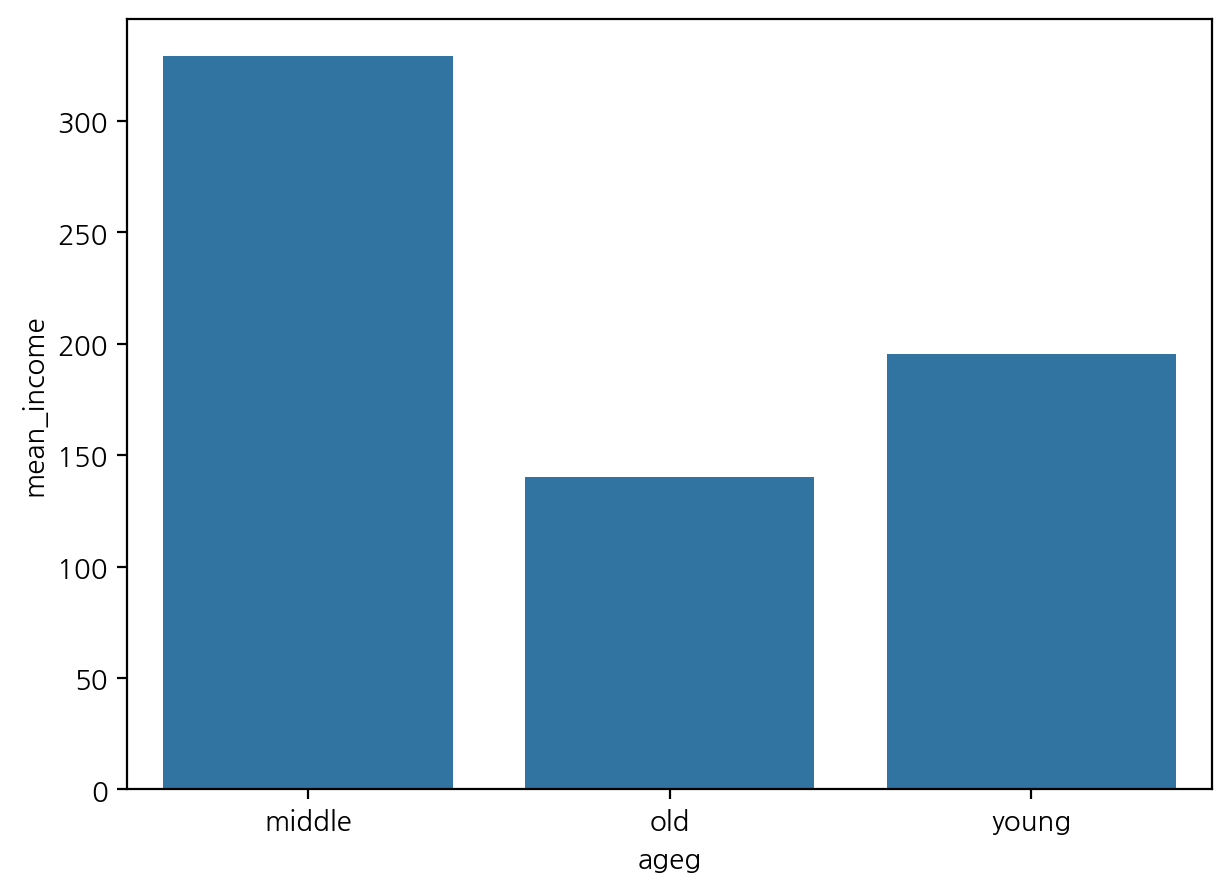

In [137]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income');

<Axes: xlabel='ageg', ylabel='mean_income'>

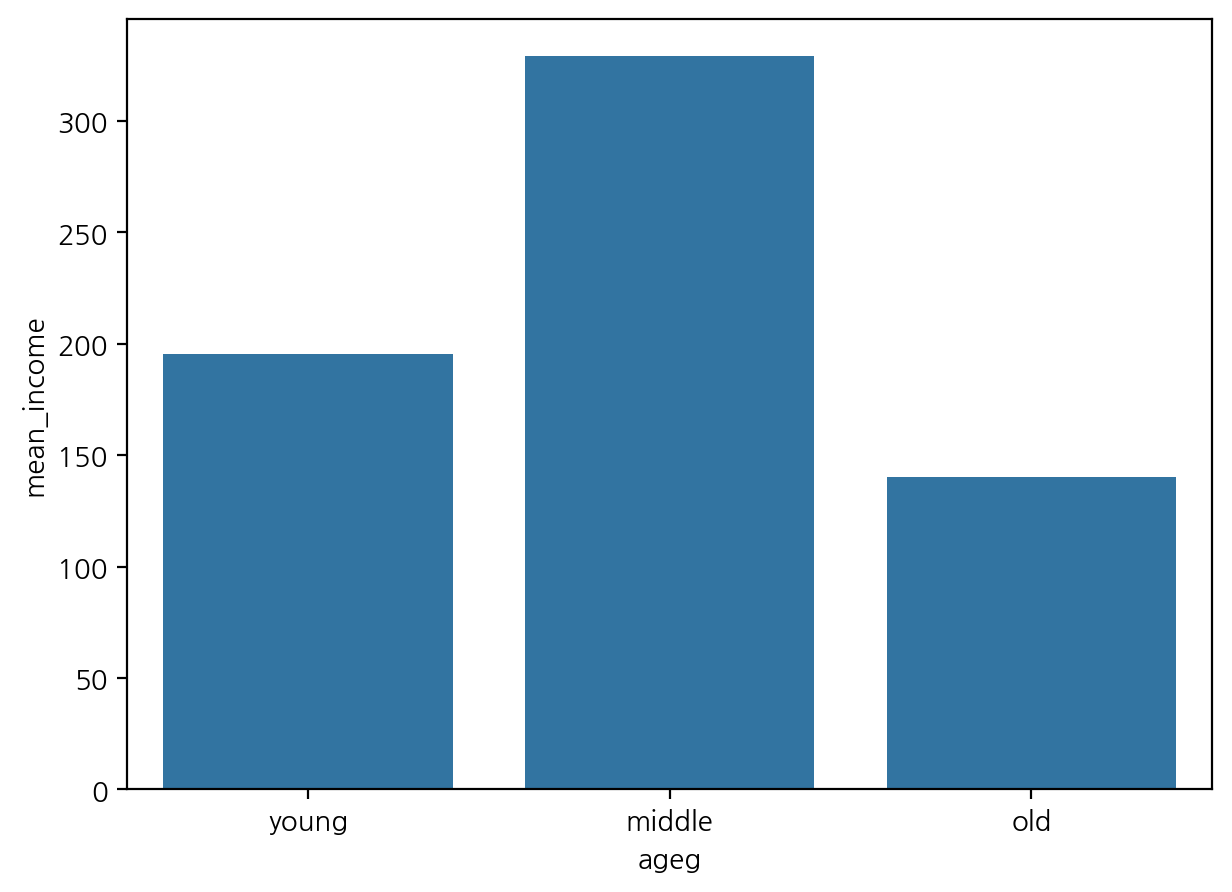

In [138]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

## 연령대 및 성별 월급 차이

In [139]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.48
1,middle,male,409.54
2,old,female,90.23
3,old,male,204.57
4,young,female,189.82
5,young,male,204.91


<Axes: xlabel='ageg', ylabel='mean_income'>

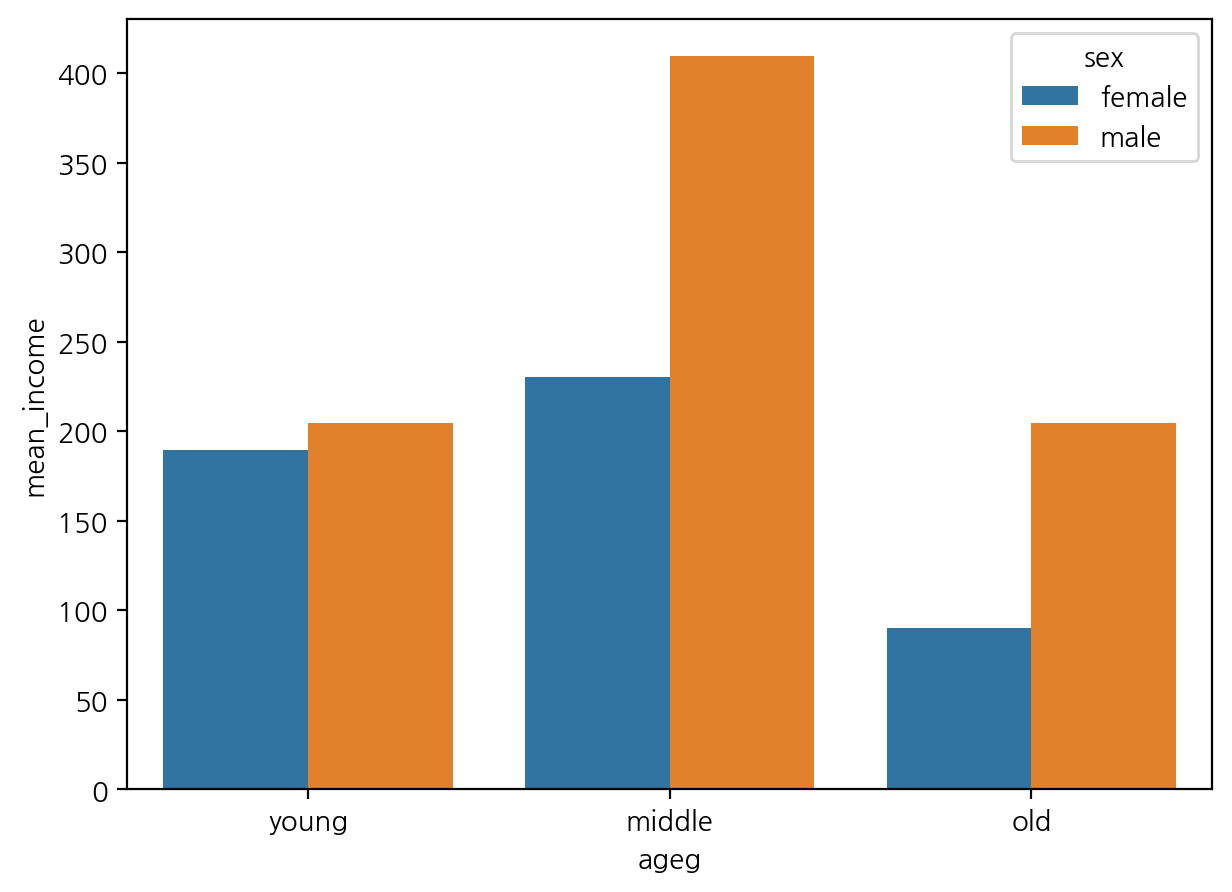

In [140]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [141]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.00
1,20.0,female,87.67
2,20.0,male,155.00
3,21.0,female,124.00
4,21.0,male,186.00


<Axes: xlabel='age', ylabel='mean_income'>

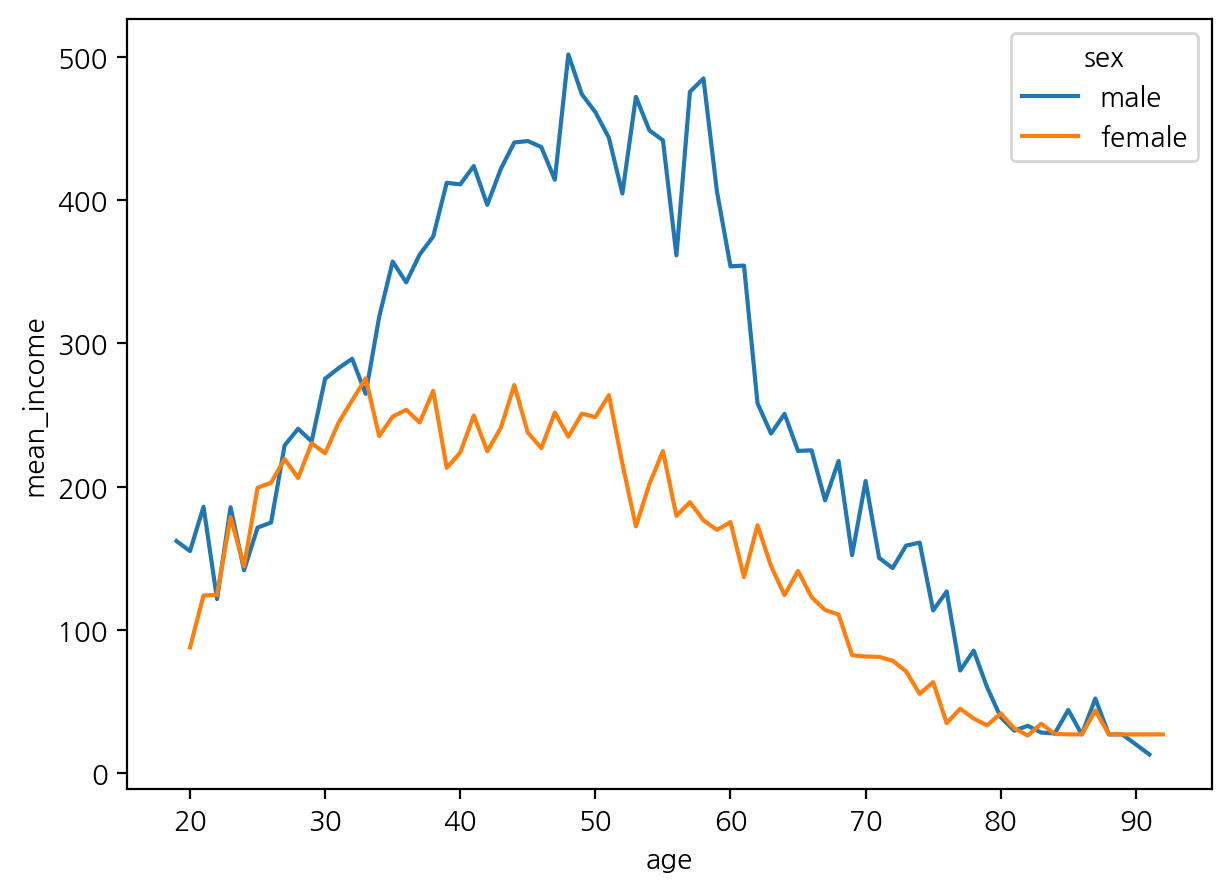

In [142]:
# 선 그래프 만들기
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

In [143]:
welfare['code_job'].dtypes

dtype('float64')

In [144]:
welfare['code_job'].value_counts()

,count
code_job,
611.0,962
941.0,391
521.0,354
312.0,275
873.0,236
...,...
784.0,2
122.0,2
861.0,1


In [145]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name= '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [146]:
list_job.shape

(156, 2)

In [147]:
welfare = welfare.merge(list_job, how ='left')

In [148]:
welfare['job'].sample(10)

,job
6809,NaN
4137,고객 상담 및 기타 사무원
6876,작물 재배 종사자
4483,NaN
1075,NaN
10972,작물 재배 종사자
10103,청소원 및 환경미화원
10787,전기∙전자 부품 및 제품 조립원
2957,NaN
10075,NaN


In [149]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [150]:
job_income = welfare.dropna(subset = ['job','income']) \
                     .groupby('job', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [151]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


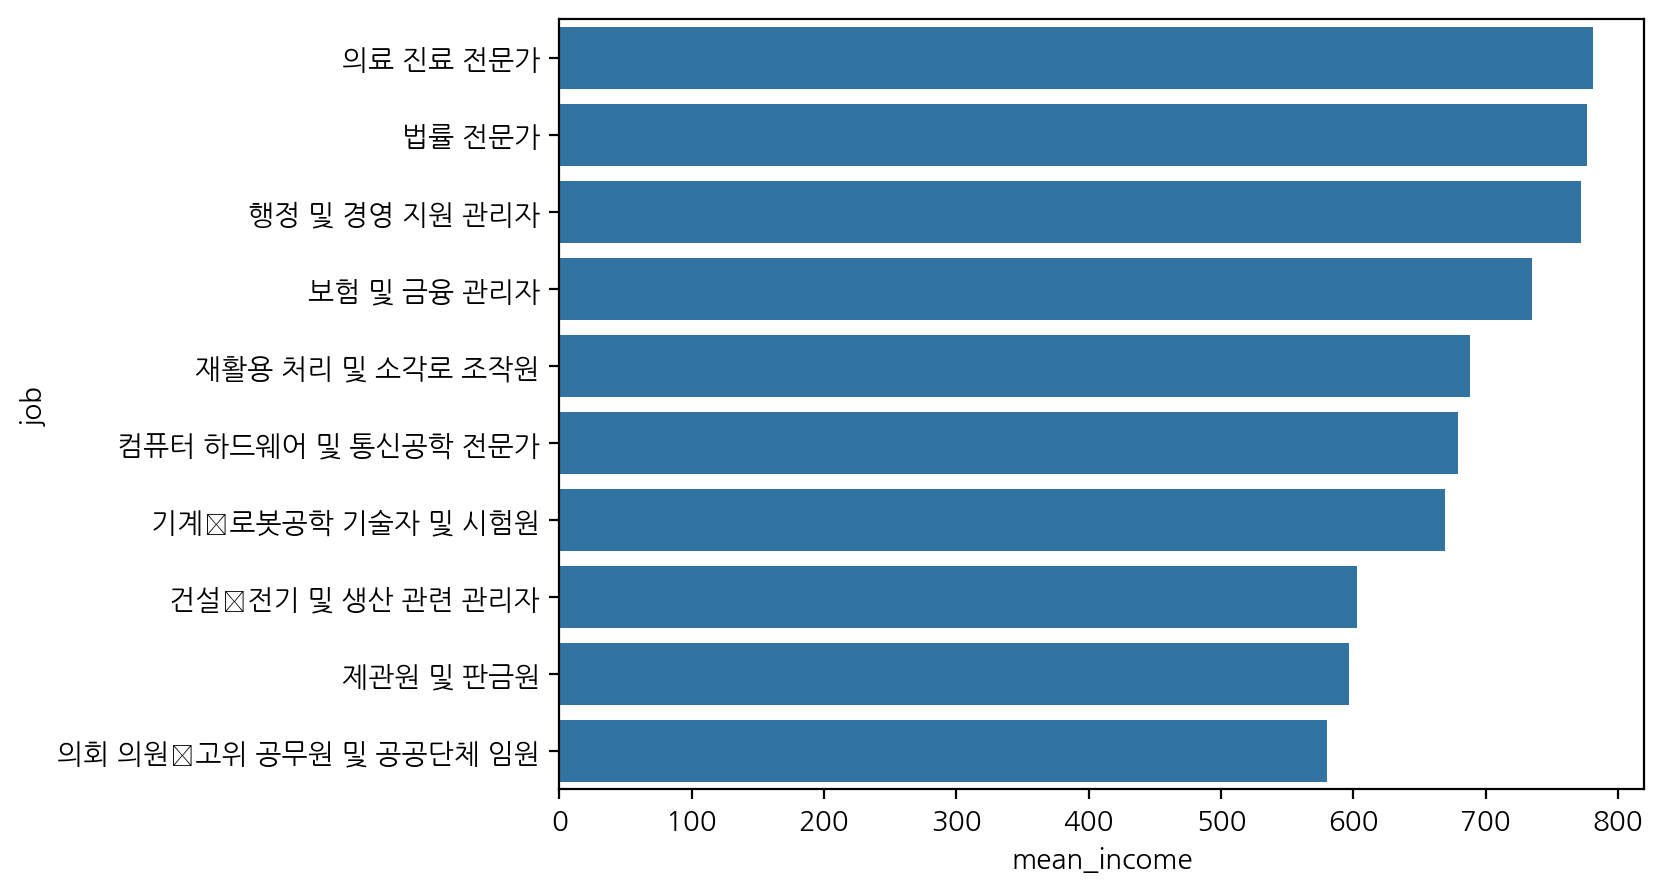

In [152]:
sns.barplot(top10, x = 'mean_income', y = 'job');

In [153]:
btm10 = job_income.sort_values('mean_income').head(10) # 기본 ascending
btm10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
126,채굴 및 토목 관련 기능 종사자,140.00
139,학예사∙사서 및 기록물 관리사,140.00
135,판매 관련 단순 종사자,140.91


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


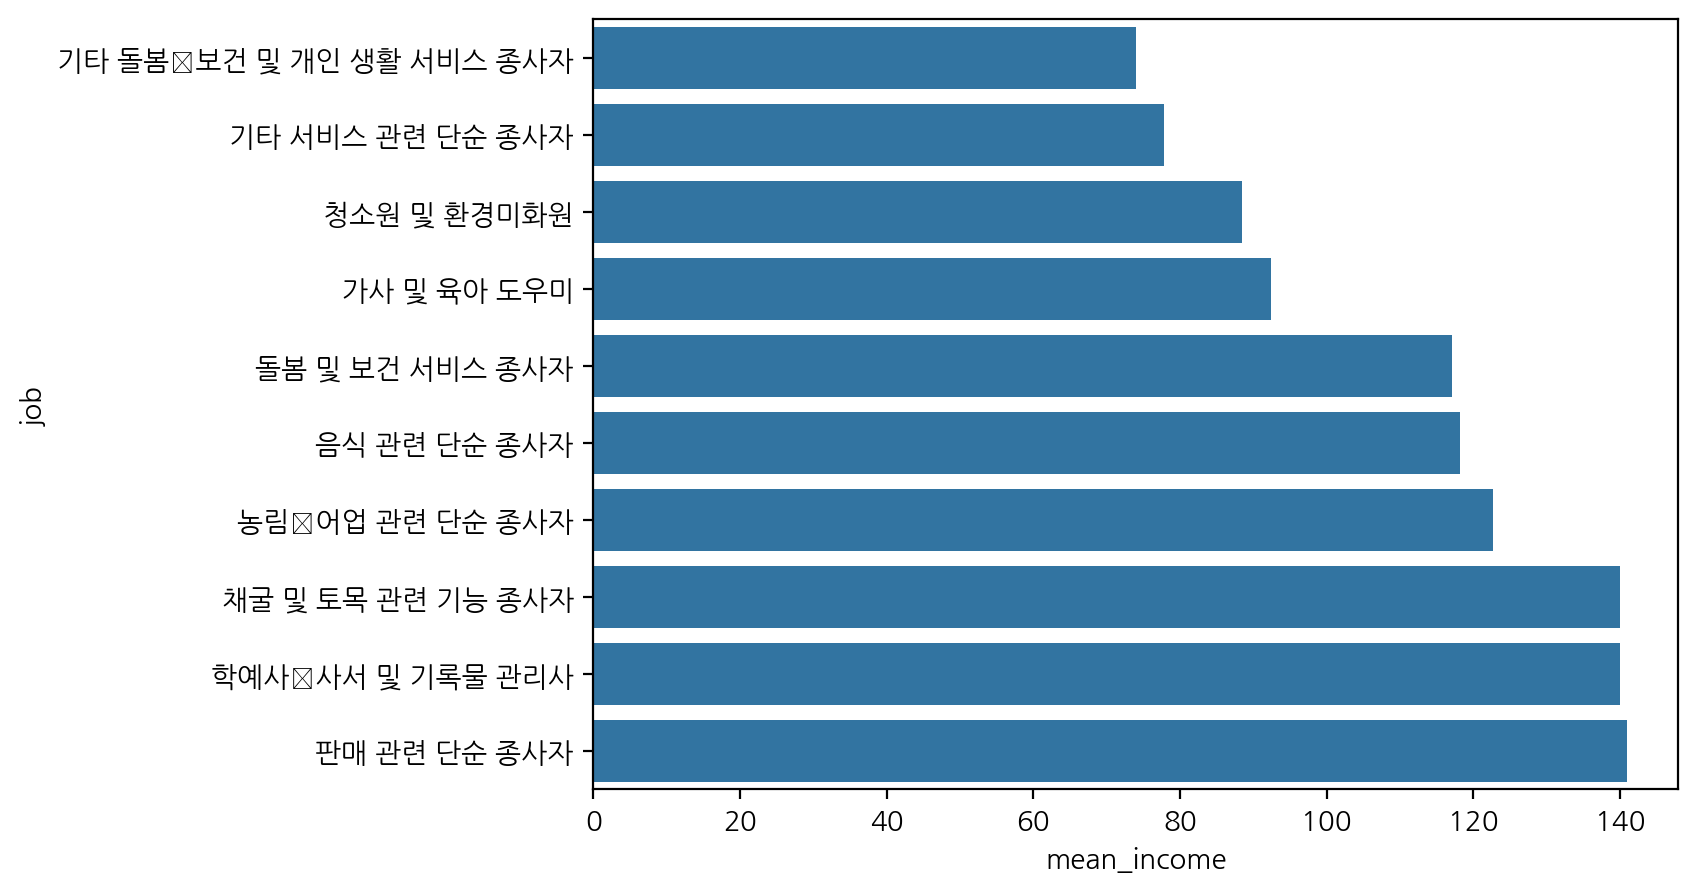

In [154]:
sns.barplot(btm10, x = 'mean_income', y = 'job');

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


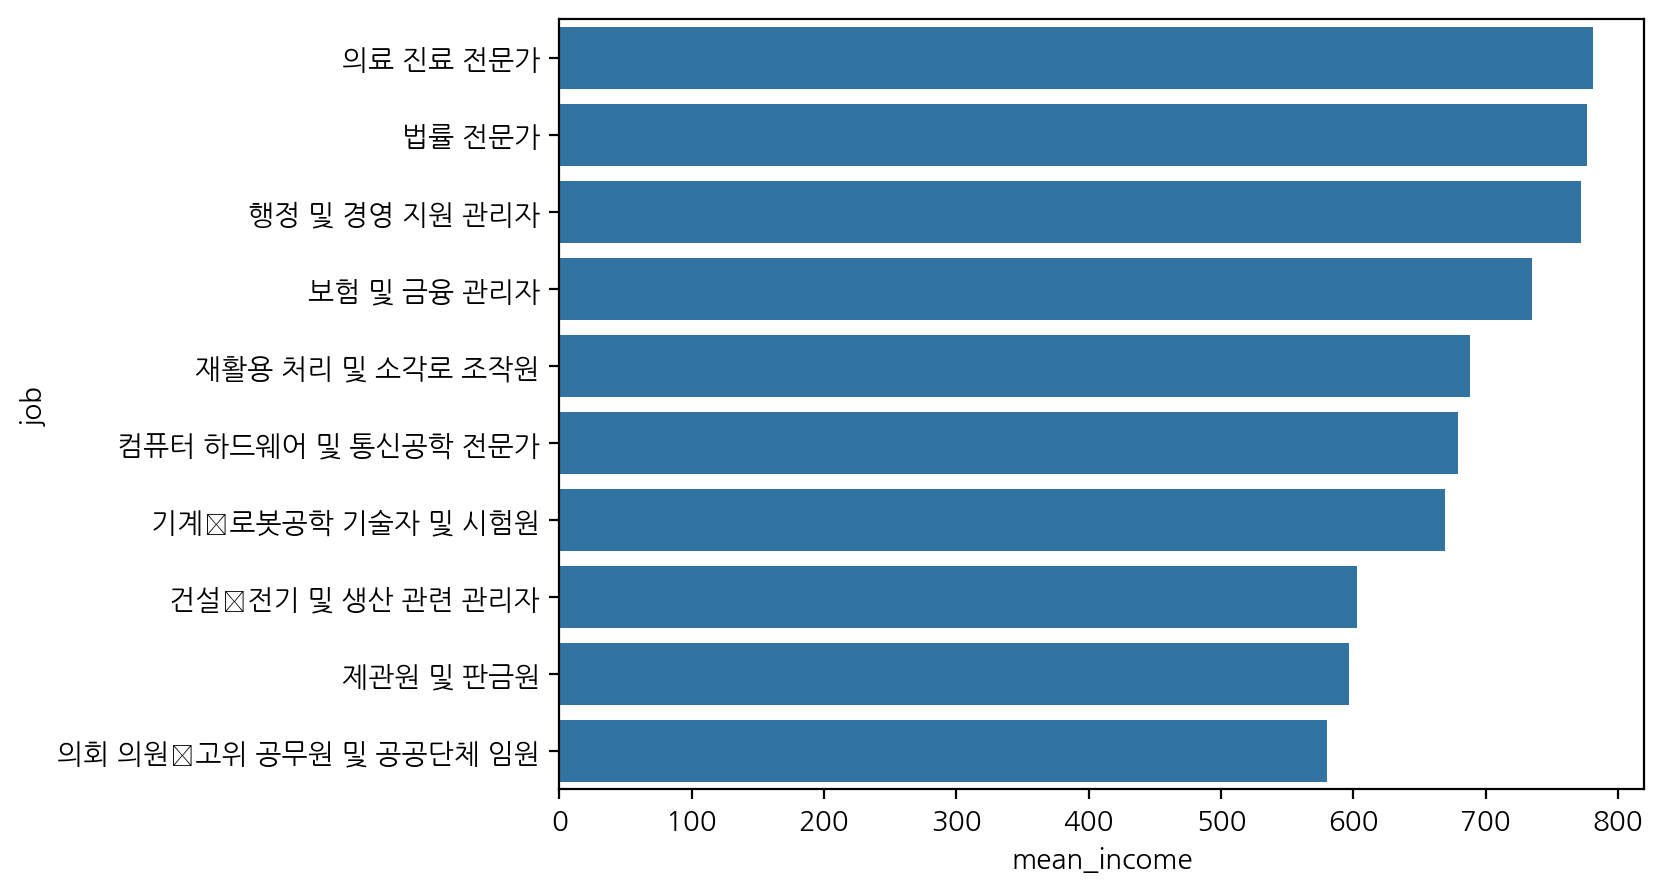

In [155]:
sns.barplot(top10, x = 'mean_income', y = 'job');

[(0.0, 800.0)]

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


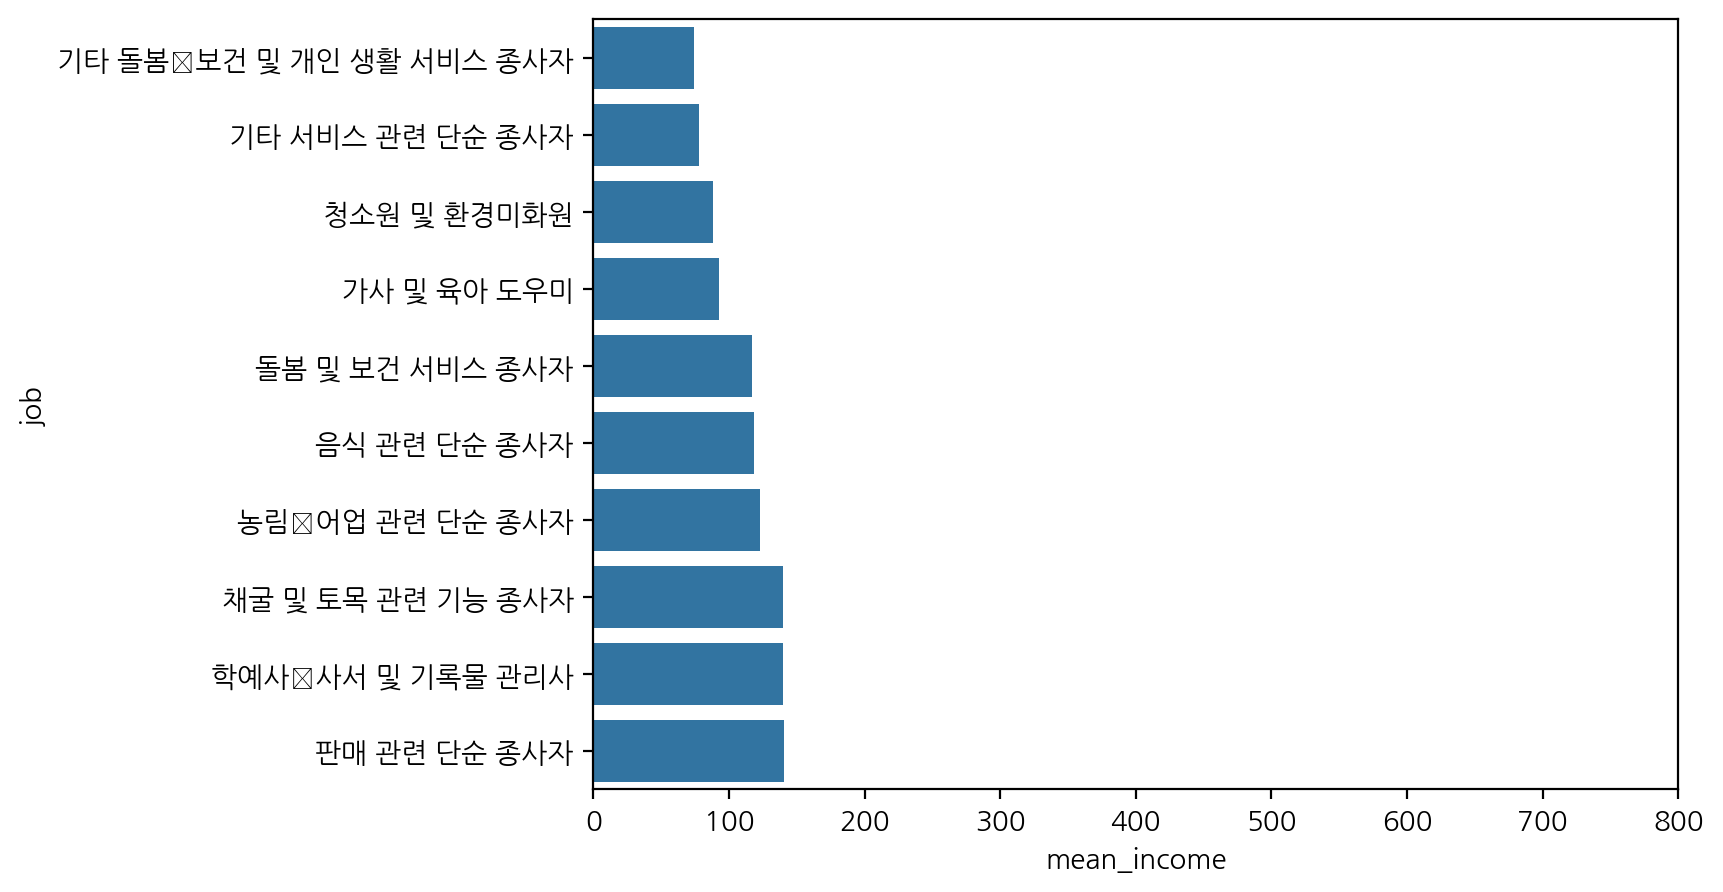

In [156]:
sns.barplot(btm10, x = 'mean_income', y = 'job').set(xlim = (0, 800))

## 성별 직업 빈도

In [157]:
job_male = welfare.dropna(subset = ['job'])\
                  .query('sex == "male"')\
                  .groupby('job', as_index = False)\
                  .agg( n = ('job', 'count'))\
                  .sort_values('n', ascending = False)
job_male.head(10)

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [158]:
job_female = welfare.dropna(subset = ['job'])\
                  .query('sex == "female"')\
                  .groupby('job', as_index = False)\
                  .agg( n = ('job', 'count'))\
                  .sort_values('n', ascending = False)
job_female.head(10)

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


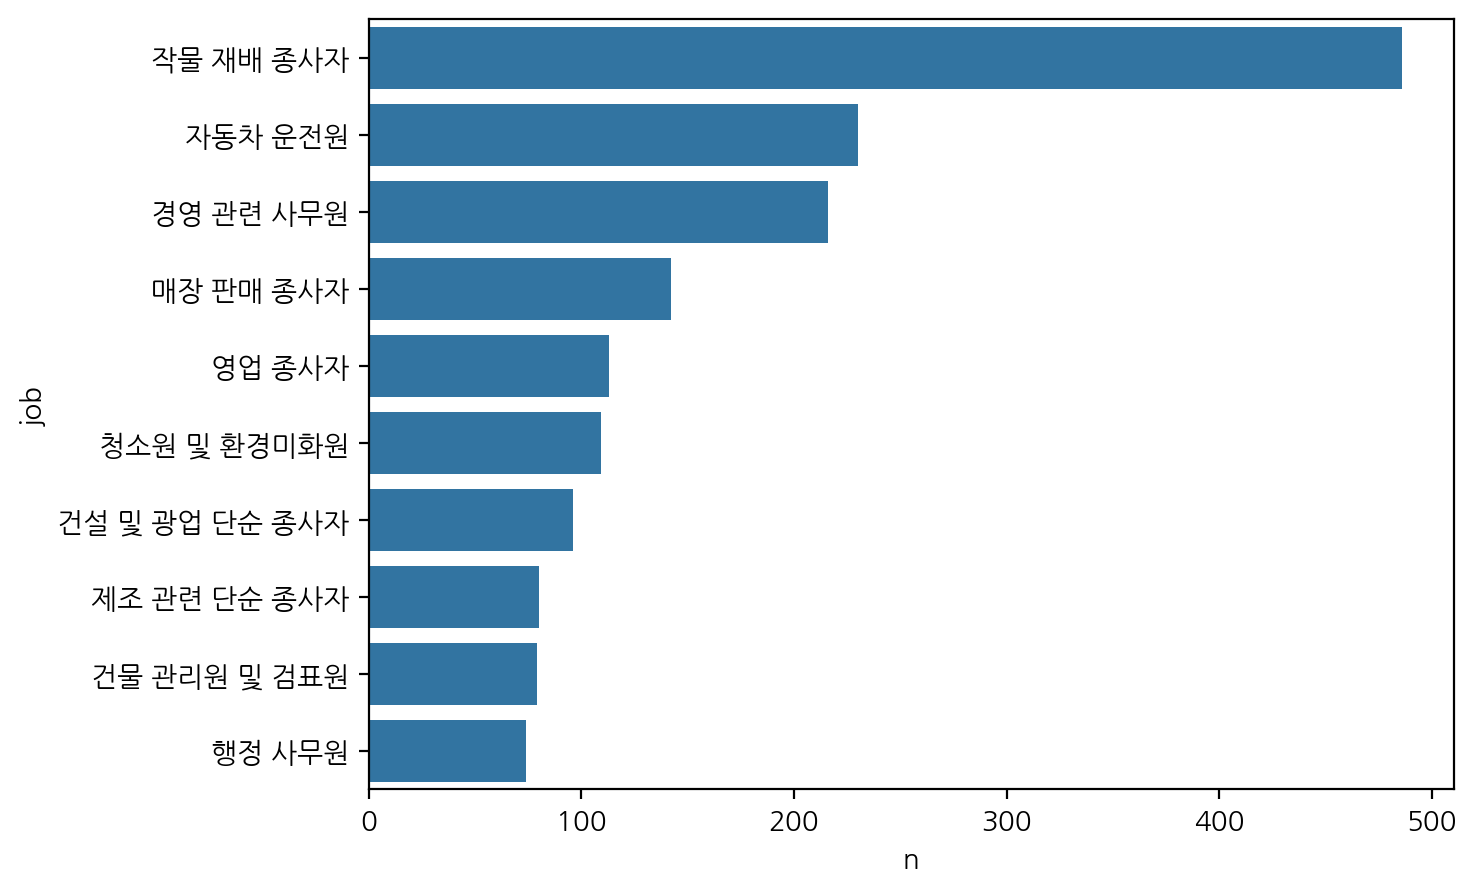

In [159]:
sns.barplot(job_male.head(10), x = 'n', y = 'job');

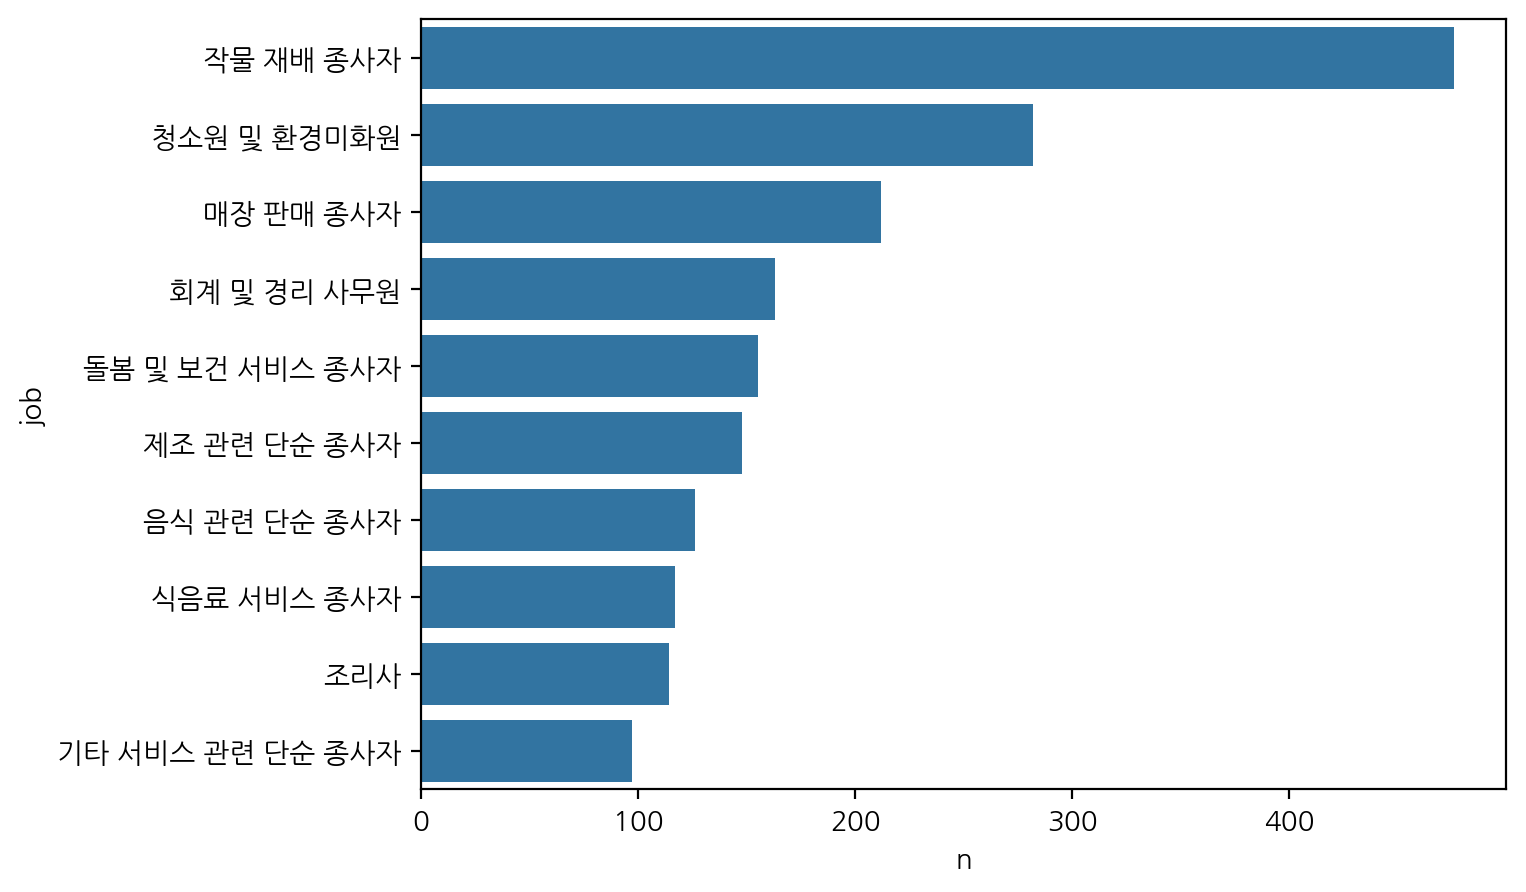

In [160]:
sns.barplot(job_female.head(10), x = 'n', y = 'job');

## 종교 유무에 따른 이혼율

In [161]:
welfare['religion'].dtypes

dtype('float64')

In [162]:
welfare['religion'].value_counts()

,count
religion,
2.0,7815
1.0,6603


In [163]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

,count
religion,
no,7815
yes,6603


In [164]:
welfare['religion'].dtypes

dtype('O')

<Axes: xlabel='religion', ylabel='count'>

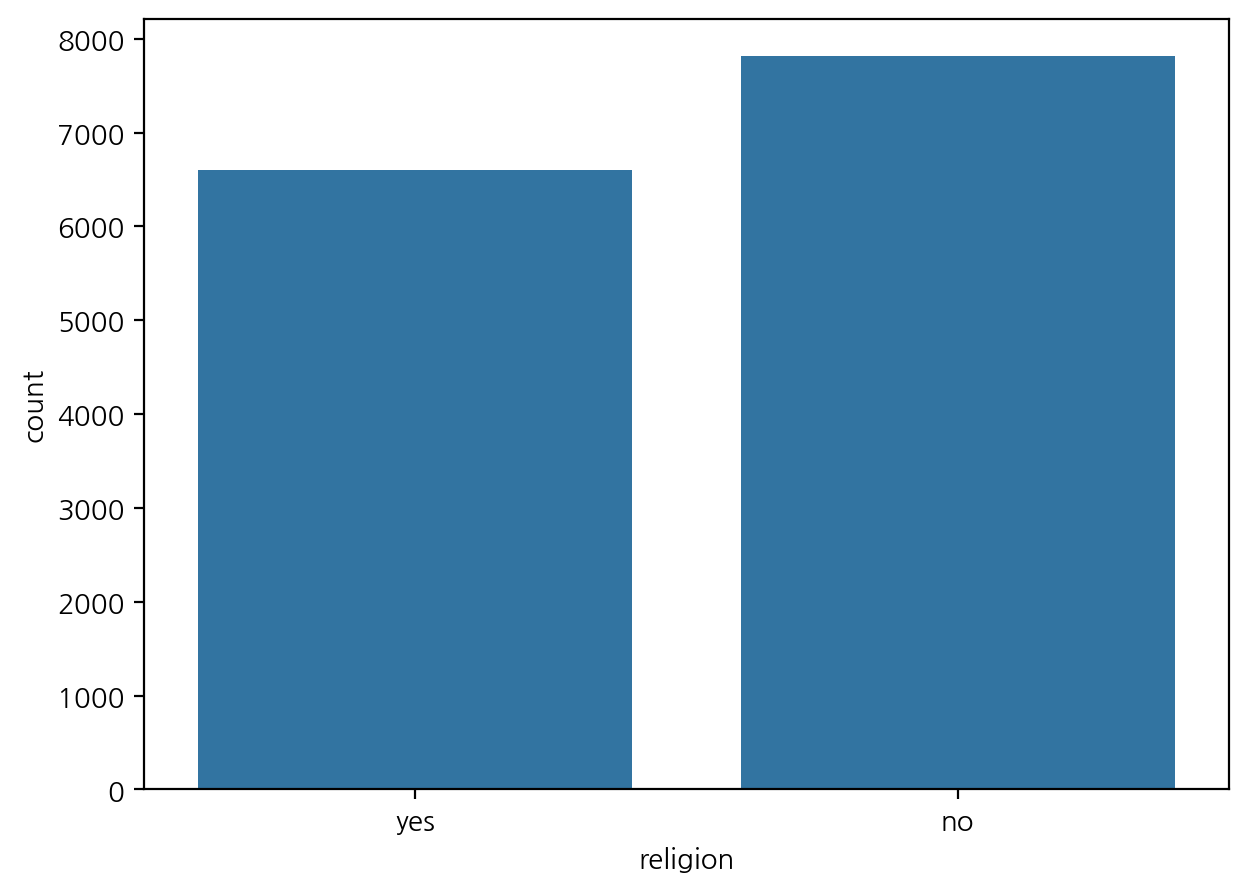

In [165]:
sns.countplot(data = welfare, x = 'religion')

In [166]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [167]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

,count
marriage_type,
1.0,7190
5.0,2357
0.0,2121
2.0,1954
3.0,689
4.0,78
6.0,29


In [170]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))
welfare['marriage'].head(5)

,marriage
0,etc
1,etc
2,divorce
3,marriage
4,marriage


In [169]:
welfare.shape

(14418, 834)

In [177]:
n_divorce = welfare.groupby('marriage', as_index= False).agg( n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

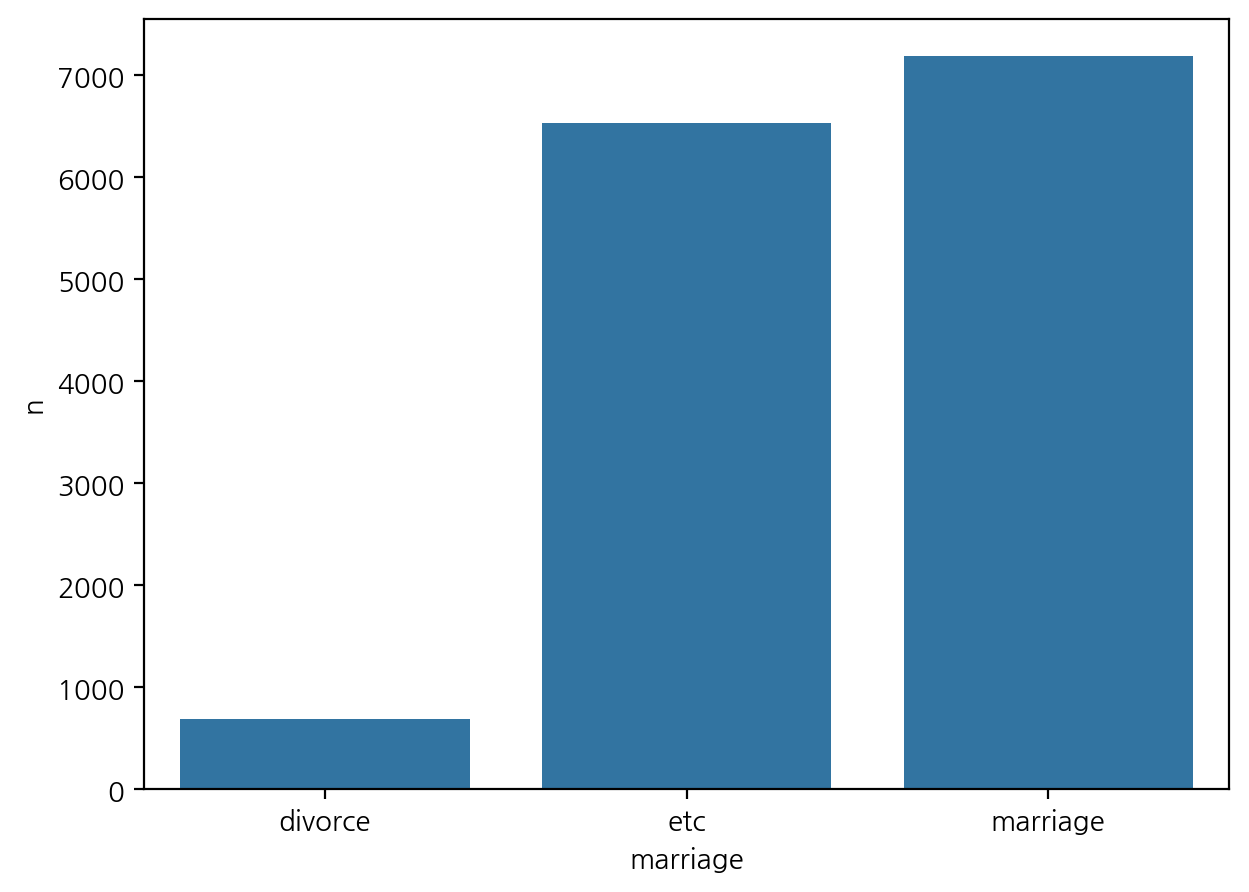

In [178]:
sns.barplot(n_divorce, x = 'marriage', y = 'n')

In [179]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts()
rel_div

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [180]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)    # nomalize 확률로 표기
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


In [181]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion']* 100)

rel_div

,religion,marriage,proportion
1,no,divorce,9.50
3,yes,divorce,7.95


<Axes: xlabel='religion', ylabel='proportion'>

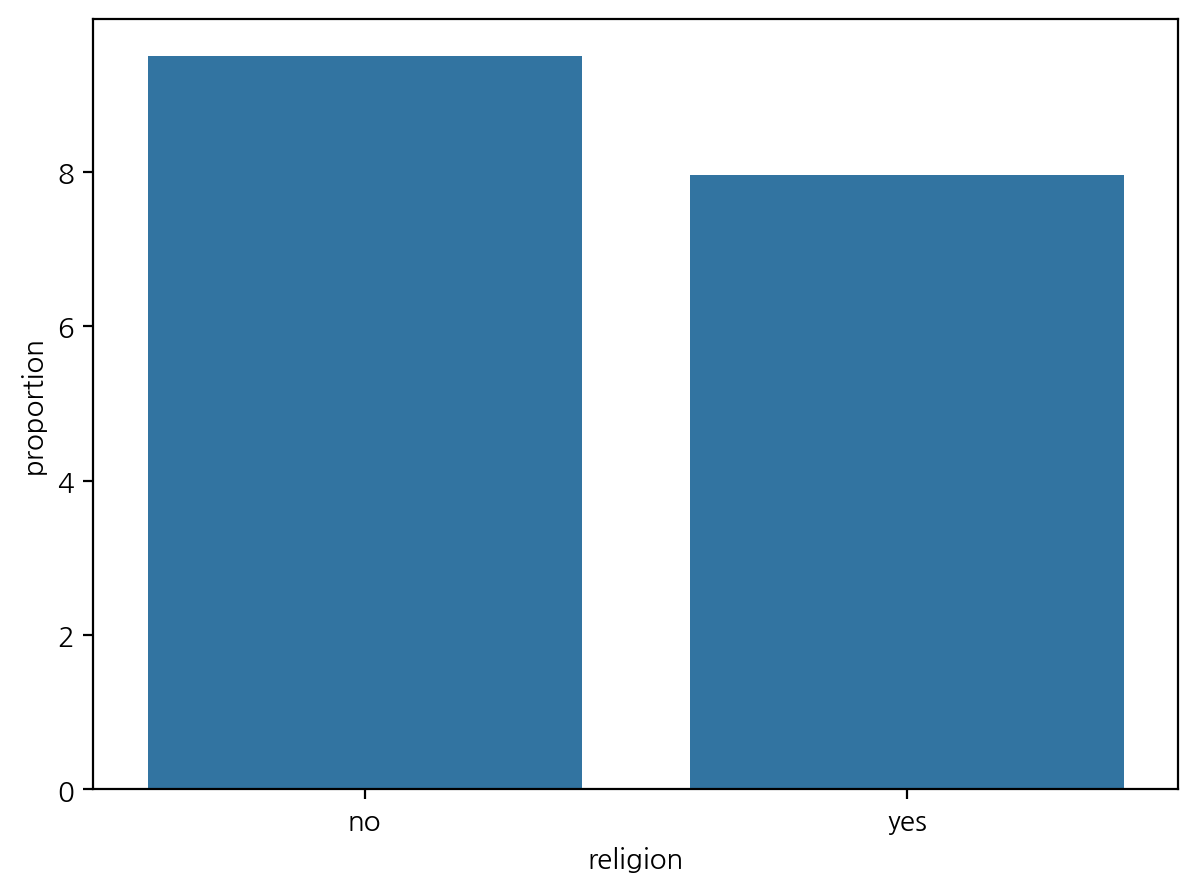

In [182]:
sns.barplot(rel_div, x = 'religion', y = 'proportion')

In [183]:
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.91
1,middle,divorce,0.09
2,old,marriage,0.91
3,old,divorce,0.09
4,young,marriage,0.95
5,young,divorce,0.05


In [184]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


In [185]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)

age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.90
1,middle,no,divorce,0.10
2,middle,yes,marriage,0.92
3,middle,yes,divorce,0.08
4,old,no,marriage,0.90
5,old,no,divorce,0.10
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


In [186]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100)

age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.50
3,middle,yes,divorce,8.25
5,old,no,divorce,9.56
7,old,yes,divorce,7.78


<Axes: xlabel='ageg', ylabel='proportion'>

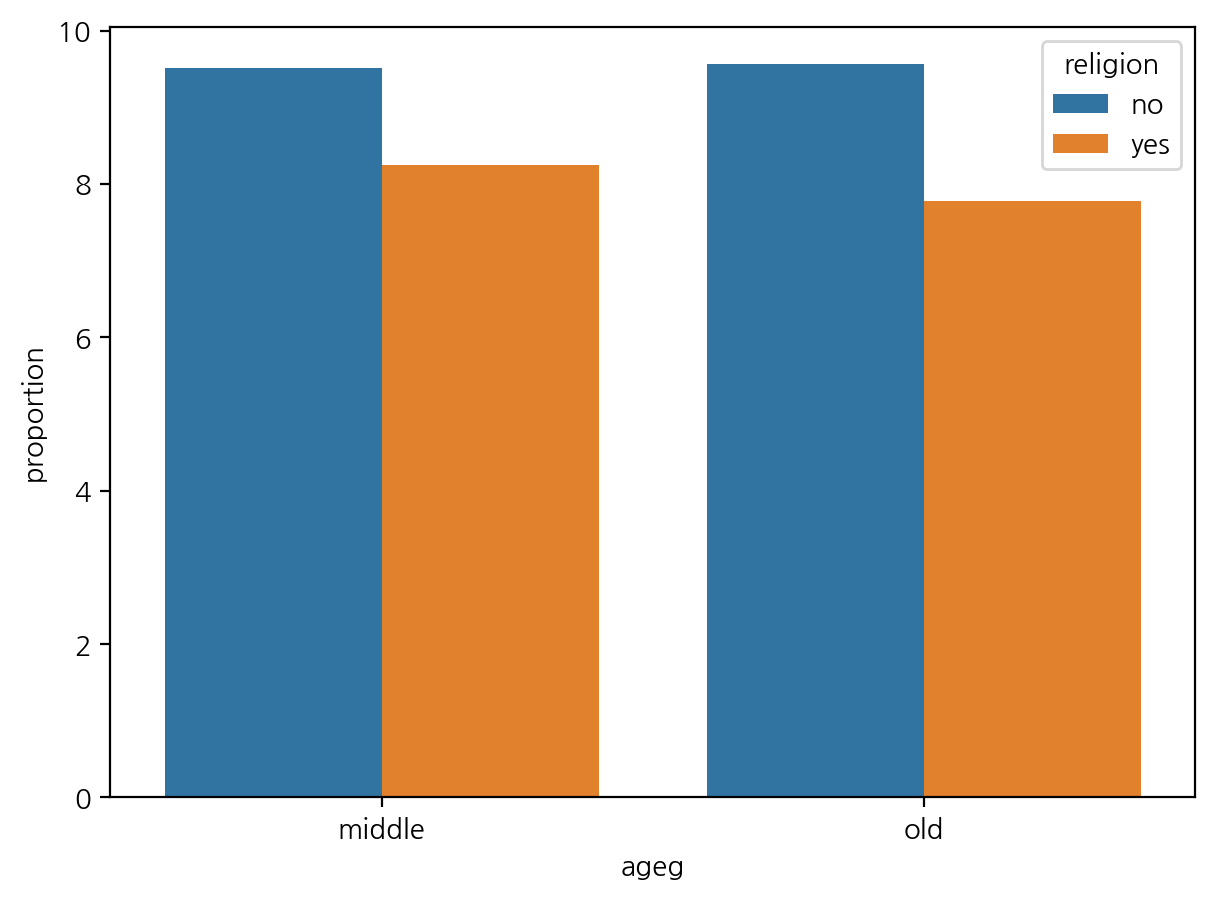

In [187]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 지역별 연령대 비율

In [188]:
welfare['code_region'].dtypes

dtype('float64')

In [189]:
welfare['code_region'].value_counts()

,count
code_region,
2.0,3246
7.0,2466
3.0,2448
1.0,2002
4.0,1728
5.0,1391
6.0,1137


In [190]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [191]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [192]:
welfare[['code_region', 'region']].sample(10)

,code_region,region
12180,7.0,광주/전남/전북/제주도
10459,4.0,대구/경북
3504,2.0,수도권(인천/경기)
4100,7.0,광주/전남/전북/제주도
737,1.0,서울
9800,4.0,대구/경북
13506,2.0,수도권(인천/경기)
7990,5.0,대전/충남
1894,1.0,서울
10144,4.0,대구/경북


In [193]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.46
1,강원/충북,middle,0.31
2,강원/충북,young,0.23
3,광주/전남/전북/제주도,old,0.45
4,광주/전남/전북/제주도,middle,0.32
5,광주/전남/전북/제주도,young,0.23
6,대구/경북,old,0.50
7,대구/경북,middle,0.30
8,대구/경북,young,0.20
9,대전/충남,old,0.41


In [194]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


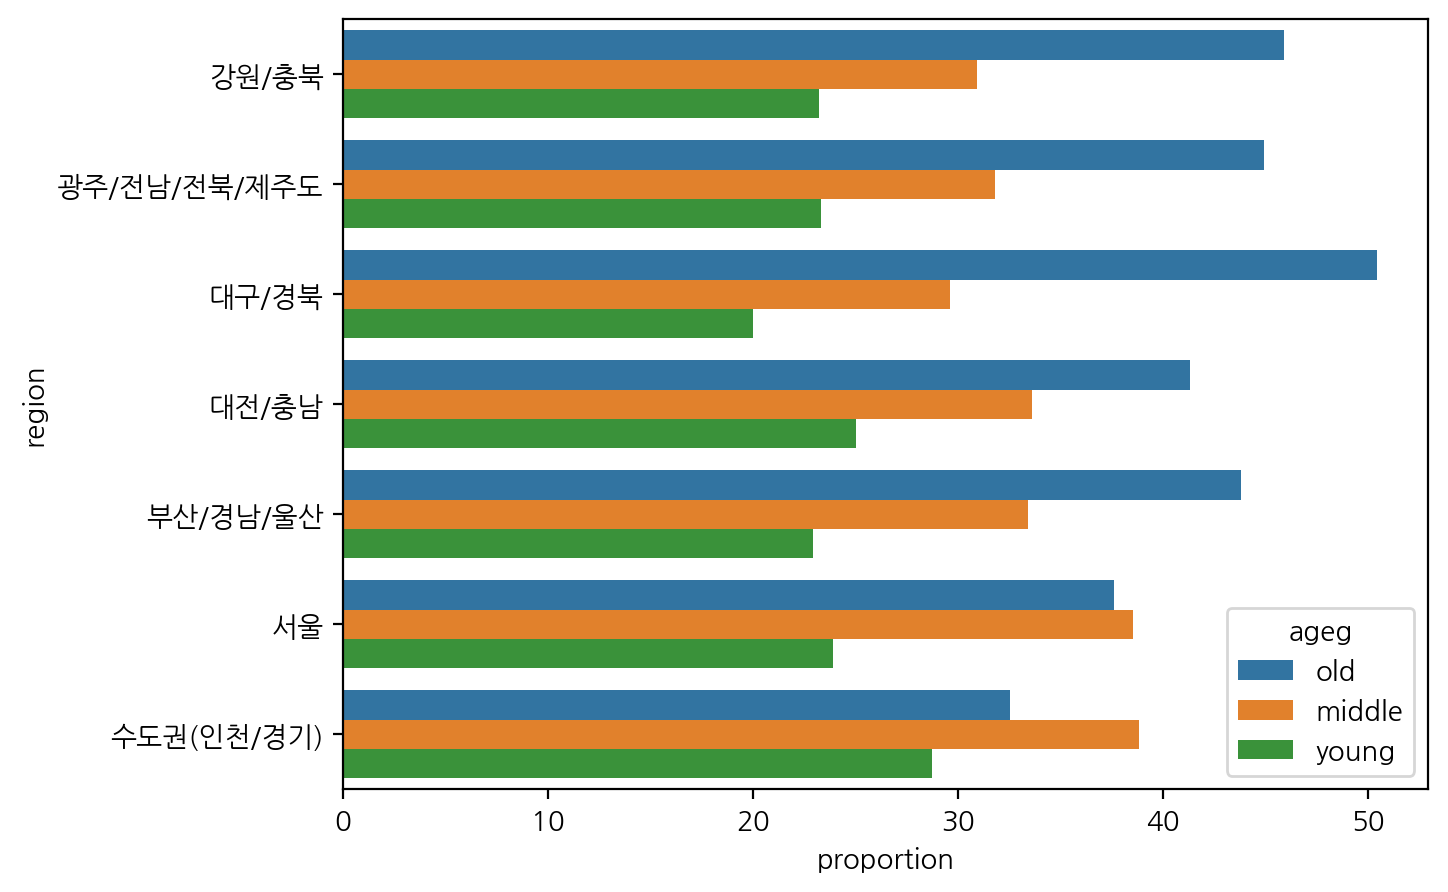

In [197]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg');

In [196]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


In [198]:
region_ageg[['region', 'ageg', 'proportion']].head()

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8


In [202]:
region_ageg[['region', 'ageg', 'proportion']] # 데이터가 길어서 불편함, 피벗으로 축약 필요

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


### 피벗 테이블 기말 시험 예상

In [199]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


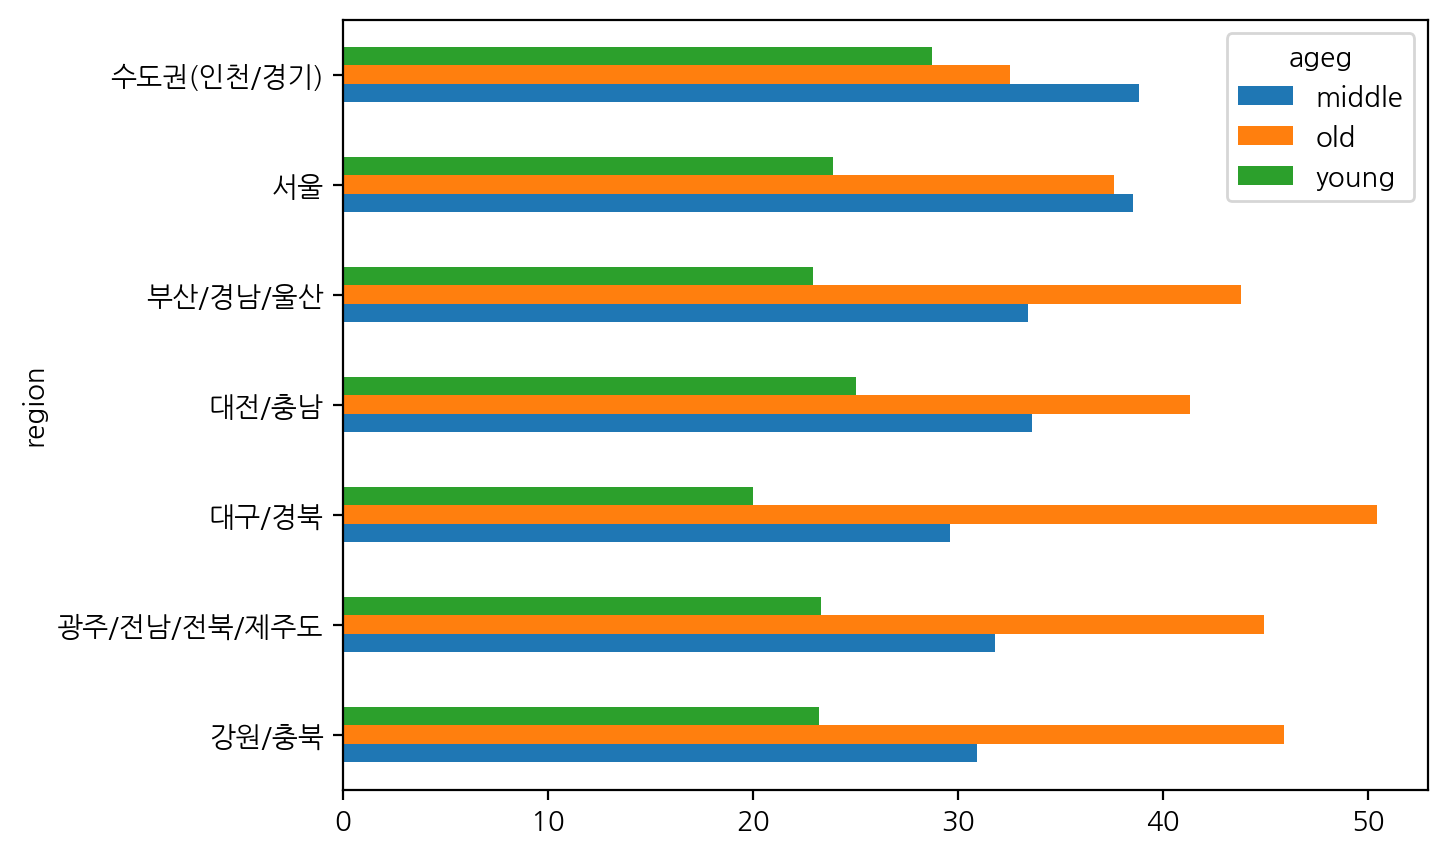

In [206]:
pivot_df.plot.barh();

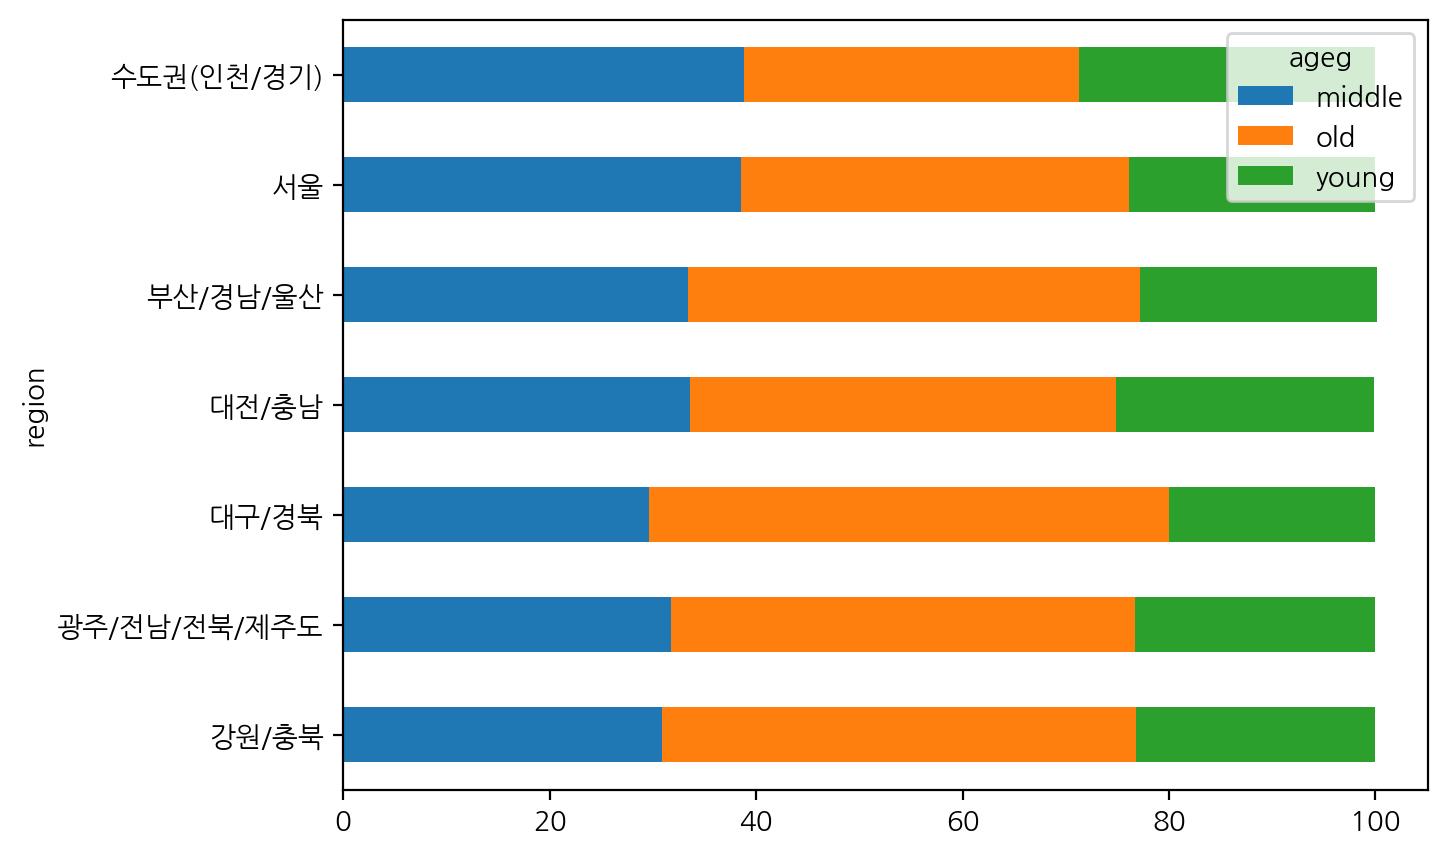

In [201]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True);

In [210]:
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


In [213]:
pivot_df.sort_values('old')

ageg,middle,old,young
region,,,
수도권(인천/경기),38.8,32.5,28.7
서울,38.5,37.6,23.9
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
광주/전남/전북/제주도,31.8,44.9,23.3
강원/충북,30.9,45.9,23.2
대구/경북,29.6,50.4,20.0


In [214]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


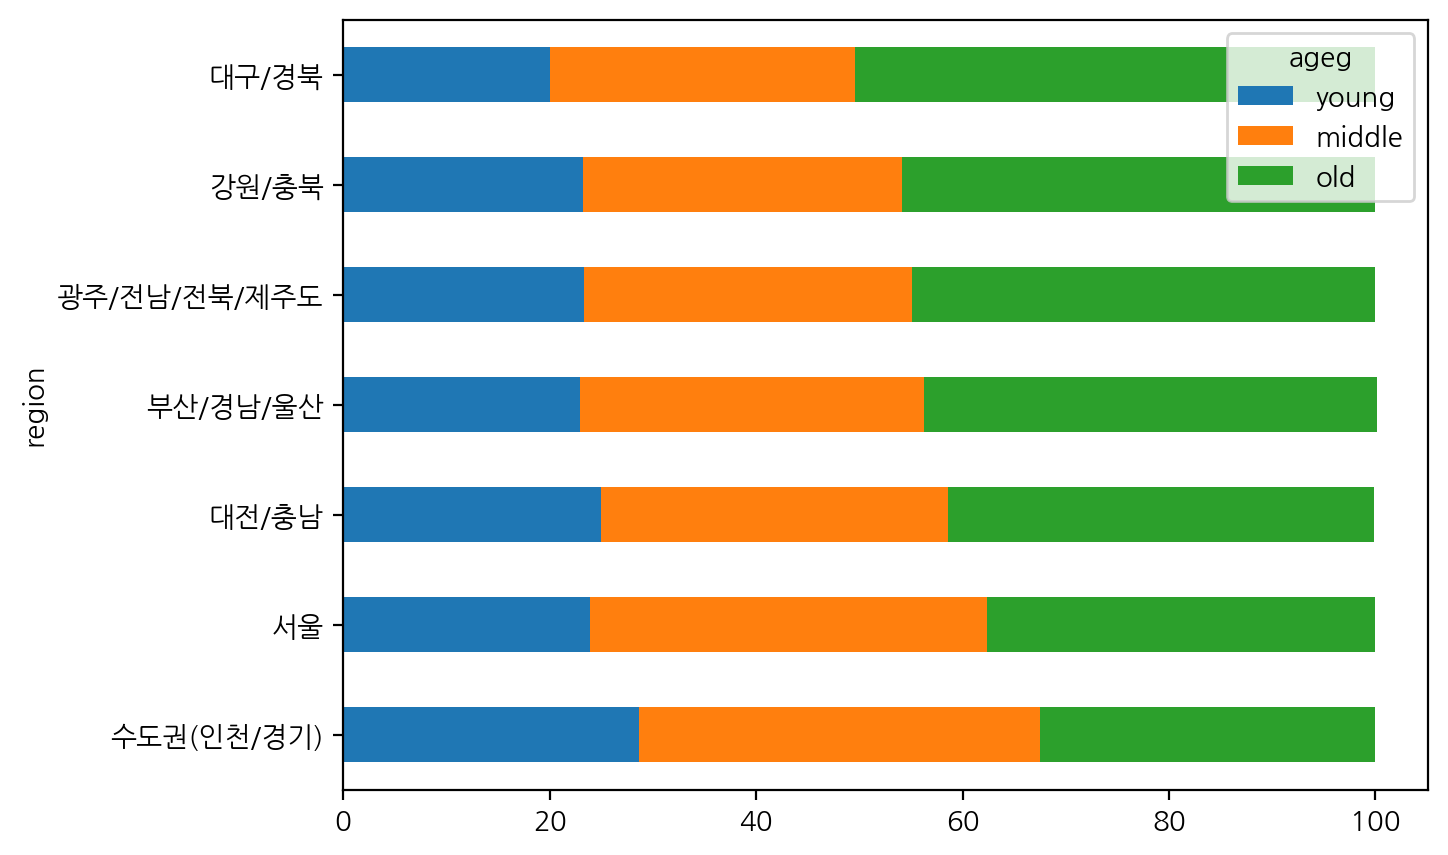

In [215]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True);

## 종료